# Final Project

by Samuel Sovi

## Background

Discord is a messaging platform that I have used since around my sophomore year during which it started gaining popularity among members students of my year. With the rise of COVID-19, Discord gained even more traction among me and my classmates due to the significant drop in our ability to interact with each other at school. Classes became online and with it, so did our classmate to classmate interactions. Group Projects were moved to Discord rather than the Teacher-Recommended Microsoft Teams rooms and all our mics were muted in Teams while we were all on Discord voice chat the whole time.

As such, Discord as a platform is meaningful to me because it allowed me to maintain connections during such trying times. However, I have used Discord for quite a while and it shows through my discord data package. Looking at it now, I could bet that Discord has been my most frequent used messaging platform due to the sheer number of messages I have sent on it. I still use Discord to this day to message friends which led me to want to use my Discord data for my final project because it feels like it could really reflect who I am.

On the flipside, it could be stated that all the time I spend sending messages on discord take away from me going outside. This leads me to the question of whether or not the weather outside affects how much time I spend on discord rather than going outside. Or maybe I am just trying to justify my excessive time spent inside by using cold weather as an excuse. To measure this, I will compare my messages sent on "warm" days vs the messages I sent on "cold" days. For reference, my cold tolerance is quite low. (I don't know how I survived the winter here)

## Imports

Displayed below are the imports that I used for various different parts of my project

In [11]:
import pandas as pd #used for pandas objects like DataFrames
import numpy as np # used for functions like finding mean
import matplotlib.pyplot as plt # used for graphing
import scipy as scipy # Not sure if every machine has scipy built in to python tbh
from scipy import stats # used for ttest
import json # used for reading json
import requests # used for handling requests for APIs (MapQuest)
from sklearn.model_selection import train_test_split # for train test split
from sklearn.neighbors import KNeighborsClassifier # for KNeighborsClassifier
from sklearn.linear_model import LinearRegression # for performing Linear Regression
from sklearn.tree import DecisionTreeRegressor # for creating Decision Tree
from sklearn.tree import plot_tree # for plotting decision tree

## Data Cleaning Part 1: Discord Message Data Collection

In order to better understand the effort that went in to cleaning the data for this project, I think that it's best to start by better understanding the structure of the data that Discord sends. Discord sends a zipped folder containing multiple folders, but for the purpose of this project I was only concerned with the folder titled "messages". This folder contains various folders within titled "c" followed by a string of numbers. For example, one folder could be called "c112413565838782864". Each channel or DM I have typed in has its own folder. Within each of these folders is a file called "messages.csv". The CSV file has rows with an:


* **ID:** A Message ID for Discord's internal storage
* **Timestamp:** A TimeStamp for each message in the format: YYYY-MM-DD Hour:Min:Second.Decimal ...
* **Contents:** Raw Message Text
* **Attachments:** Link to any Discord Attachments sent in the message


Seeing this, my initial thoughts were to merge there files using Python by taking all of them into DataFrames and merging them. 

Then I remembered the folder names...

I realized that since the folder names were random strings of numbers, I would not have an easy way to combine the files using code. However, I still wanted to use Discord as my main source of Data because it feels personal to me and I have a connection to Discord due to my frequent use of the platform. So I spent a couple hours manually copy pasting every single file's contents into a single file. Never before would I have ever thought that there was such thing as too much copy pasting in a single day. However, with that out of the way I was ready to move on to the next step.

### Afterthoughts

Looking back at the process, I believe I could have tried to automate the copy pasting process using my idea of merging dataframes as long as I had some sort of try-catch block in a for loop that looped from 0 to whatever the max integer limit was for the file names and slapped a "c" at the beginning and a ".csv" at the end. The try catch block would save my program from ending on an invalid file name and the overall process would save my hands from dying.


## Data Cleaning Part 2: Formatting Files in Preparation for Merging

Here, one of the main things that I was required to do was change the format of the "Timestamp" to just the date and change the column name to "date" so that I could merge it with the Meteostat data later on. In addition, I did not want to "leak DMs" due to some messages possibly being sensitive or private so I removed the contents of all my messages. From there I grouped messages by date and got the message counts per day so that I would only have one of each row for each date for merging with my MeteoStat data.

## Data Cleaning Part 3: Getting MeteoStat Weather Data

Similarly to one of our previous data assignments, I used Meteostat data from the city I'm from (San Jose). For the purpose of this project I only used data from the date range where I was in San Jose or somewhere with very similar weather. I could then use this data to merge with my message data

## Data Cleaning Part 4: Merging Meteo Stat and Weather Data

In this step, I simply merged my discord data and meteostat data on the column "date" since I already aligned them

In [12]:
# merging the meteostat and discord data
data1 = pd.read_csv("daily_msgs.csv")
data2 = pd.read_csv("San_Jose_daily_weather_cleaned.csv")
merged = pd.merge(data1, data2, on="date")
#merged = merged.drop(columns=["tmin","tmax","prcp","wdir","wspd","pres"]) #remove for more stats
merged.to_csv("merged.csv")

## Data Cleaning Part 5: Converting YYYY/MM/DD Date to Numeric and Grouping

It was quite convenient that the date format was YYYY/MM/DD because it allowed me to simply drop the slashes and the number that remained would be in chronologically in ascending order already. From there it would be easier to visualize data when needed.

In [13]:
monthly = merged.copy()
monthly["date"] = monthly["date"].str[:7]
#monthly.to_csv("monthly.csv")

grouped = monthly.groupby("date")
grouped.mean().round(0).astype(int).reset_index().to_csv("monthly.csv")

## Initial Graphing For Reference

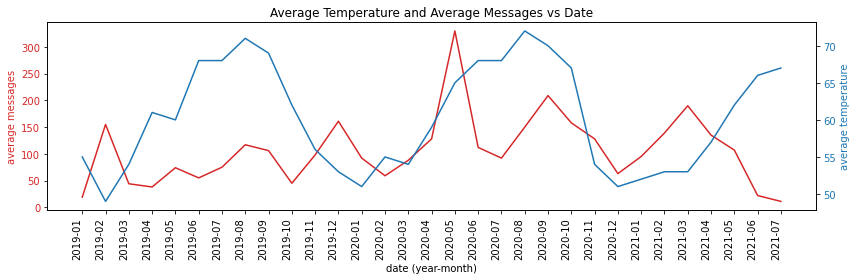

In [14]:
monthly = pd.read_csv("monthly.csv")

x = monthly["date"]

y1 = monthly["count"]

y2 = monthly["tavg"]

fig = plt.figure(figsize=(12,4))
ax1 = plt.gca()
color = 'tab:red'
ax1.set_xlabel('date (year-month)')
ax1.set_ylabel('average messages', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.title("Average Temperature and Average Messages vs Date")
plt.xticks(rotation=90, ha="right")

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('average temperature', color=color)
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

### Average Temperature and Average Message vs Date

This preliminary graph is used to infer initial possible conclusions about the relationship between average temperature and average messages over the course of time. The initial purpose of this graph was to compare the increases and decreases of Temperature and Average Messages over time. However, it is hard to draw a conclusion from this graph since it's hard to tell if there really is a relationship between the two curves. Furthermore, just comparing the average messages during summer months and winter months seems to show very little difference between the two subsets.

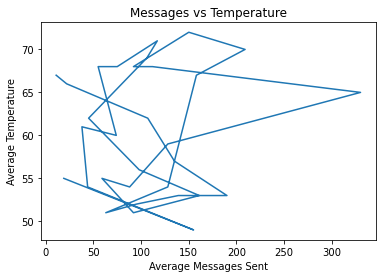

A lovely graph displaying the 'relation' between the average temperature and my average messages sent:


In [15]:
plt.figure()
plt.plot(y1,y2)
plt.title("Messages vs Temperature")
plt.xlabel("Average Messages Sent")
plt.ylabel("Average Temperature")
plt.show()

print("A lovely graph displaying the 'relation' between the average temperature and my average messages sent:")

## Comparing Two Dependent Samples (Warm and Cold Day Msg Count) Using a TTest 

# (MODIFY STEPS)

### Step 1

$H_{0}: \mu_{warm-days} \ge \mu_{cold-days}$

$H_{1}: \mu_{warm-days} < \mu_{cold-days}$

Level of Significance: 0.01 

#### Step 3

### $t = \frac{\overline{d} - \mu_{d}}{s_{\overline{d}}} = 1.287$

Since, the calculation required a summation with 886 elements, I did my calculations in the code cell below

#### Step 4

Level of Significance: 0.01 

one-tailed t-test

df = $n_{warm}$ + $n_{cold}$ - 2 = 443 + 443 - 2 = 884

$t_{calculated}$: 1.287

$t_{critical}$: 2.390

Decision Rule:

* if our computed t $\le$ 2.390, do not reject $H_0$
* if our computed t > 2.390, reject $H_0$

Decision Rule (p val):
* if our p-value $\ge$ 0.1 do not reject $H_0$
* if our p-value < 0.1 reject $H_0$

#### Step 5

Shown below


In [16]:
warm_df = merged[merged["tavg"] >= 60]
warm_df = warm_df[2:] # trimmed to make both sets equal length
#print(len(warm_df))
#print(np.mean(warm_df["count"]))
#print(np.std(warm_df["count"], ddof = 1))
cold_df = merged[merged["tavg"] < 60]
#print(len(cold_df))
#print(np.mean(cold_df["count"]))
#print(np.std(cold_df["count"], ddof = 1))

d_bar = (np.sum(warm_df["count"]) - np.sum(cold_df["count"]))/(len(warm_df["count"]) + len(cold_df["count"]))
#print("d_bar:", d_bar)

dif_sum = 0

for i in range(len(warm_df)):
    dif_sum = dif_sum + (((warm_df["count"].iloc[i] - cold_df["count"].iloc[i])-d_bar)**2) #(warm_df["count"][i] - cold_df["count"][i])
dif_sum = dif_sum / (886 - 1)

t_calc = np.sqrt(dif_sum)

dif_std = t_calc / np.sqrt(886)

t_calc = (d_bar - 0) / dif_std

print("t_calculated:", t_calc)

t , p = stats.ttest_rel(warm_df["count"], cold_df["count"])

print("t val:", t)

print("p val:", p)

t_calculated: 1.2873737078696859
t val: 1.2872489683720645
p val: 0.19868118081619807


## TTest Conclusion

Since my calculated t value of 1.287 is less than the t critical of 2.390, we cannot reject $H_0$ at a significance level of 0.01. This tells us that the amount of messages sent during colder days are likely less than or equal to those sent during warmer days. From this conclusion, I can also infer that I am not necessarily more likely to spend more time outside on a warmer day than a colder day.


In [17]:
#merged = merged.drop(columns=["tmin","tmax","prcp","wdir","wspd","pres"]) #remove for more stats
#merged.to_csv("ml_merged.csv")

active_df = merged[merged["count"] >= merged["count"].median()] #447 (more) active days
inactive_df = merged[merged["count"] < merged["count"].median()] #441 (comparatively) inactive days

active_df.insert(0, "active", 1)
inactive_df.insert(0, "active", 0)
ml_df = pd.concat([active_df, inactive_df], axis = 0)

X_vals = ml_df.drop("active", axis = 1)
X_vals = X_vals.drop("date", axis = 1)
X_vals = X_vals.drop("count", axis = 1)

y_vals = ml_df["active"]

X_train, X_test, y_train, y_test = train_test_split(X_vals, y_vals, test_size = 0.25, random_state = 0, stratify = y_vals)
kNN_classifier = KNeighborsClassifier(n_neighbors=100).fit(X_train, y_train)
prediction = kNN_classifier.predict(X_test)
print("Acc:", kNN_classifier.score(X_test, y_test))

Acc: 0.5945945945945946


## KNN Prediction Conclusion

It turns out that whether I am more active than usual or less active than usual is not very predictable based off the weather due to an accuracy number of 0.59. Considering how my TTest from earlier went, it may be fair to say that I tend to be more active on warmer days maybe. But then again, there likely isn't that much of a relationship since our accuracy number is so low.

## I Made A Heatmap Because Heatmaps are Cool! (conclusions drawn shown below)

In [18]:
merged_1 = merged.select_dtypes(['number'])
corr_df = merged_1.corr()
corr_df.style.background_gradient(cmap='bwr').set_precision(2)

/var/folders/zp/vqj6rb6x7ds5vbwmlyshlyn40000gn/T/ipykernel_27717/2988382908.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_df.style.background_gradient(cmap='bwr').set_precision(2)


,count,tavg,tmin,tmax,prcp,wdir,wspd,pres
count,1.00,0.02,0.01,0.01,0.00,0.05,0.03,-0.01
tavg,0.02,1.00,0.92,0.95,-0.13,0.21,0.10,-0.50
tmin,0.01,0.92,1.00,0.78,-0.07,0.16,0.24,-0.55
tmax,0.01,0.95,0.78,1.00,-0.16,0.23,-0.04,-0.41
prcp,0.00,-0.13,-0.07,-0.16,1.00,-0.11,0.13,-0.08
wdir,0.05,0.21,0.16,0.23,-0.11,1.00,0.02,0.00
wspd,0.03,0.10,0.24,-0.04,0.13,0.02,1.00,-0.33
pres,-0.01,-0.50,-0.55,-0.41,-0.08,0.00,-0.33,1.00


### About the HeatMap

All the temperature categories have high relationship levels and are red since the temperature doesn't really fluctuate too much on a single day in San Jose, California. It was interesting to see how low the relationship levels of the wind and rain were with other weather stats though. The main takeaway from this heatmap for the sake of my project, however, is the low numbers for count with any other category. This is already starting to show signs of the two data sets being unrelated. Maybe as princess Elsa once said "The cold never bothered me anyway" (Elsa, 2013).

## Regression Line

R^2: -0.014078433287539216


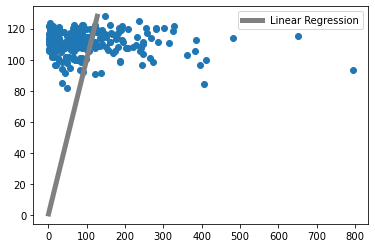

In [19]:
y_vals = ml_df["count"]

X_train, X_test, y_train, y_test = train_test_split(X_vals, y_vals, test_size = 0.25, random_state = 0)

regression = LinearRegression().fit(X_train, y_train)
y_pred = regression.predict(X_test)
print("R^2:", regression.score(X_test, y_test))

plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_pred)], [min(y_test), max(y_pred)],color = 'gray', lw = 5, label = 'Linear Regression')
#plt.xlabel("Sale Price Actual")
#plt.ylabel("Sale Price Predicted")
#plt.title("Regression Line of Sales Price Actual vs Predicted")
plt.legend()
plt.show()

## Regression Line Conclusion

As can be seen from the graph, the points do not seem to be forming any kinda of relationship-drawable figure. As such, the regression line is trying its hardest, but to no avail. Nobody is convinced of the relationship since there does not seem to be one between the weather and my discord message sending frequency.

## Will the Decision Tree Redeem my the Relationship Between my Discord Messages and the Weather?

R^2: -0.05965985304267374


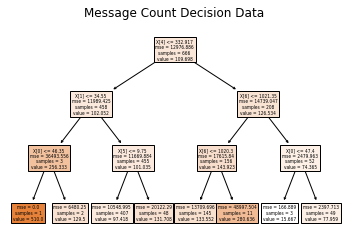

In [20]:
regressor = DecisionTreeRegressor(max_depth = 3, random_state = 0).fit(X_train, y_train)
print('R^2:', regressor.score(X_test, y_test))
plot_tree(regressor, filled = True)
plt.title("Message Count Decision Data")
plt.show()

## DecisionTree Regressor Conclusion:

# No

## DecisionTreeRegressor Conclusion (part 2)

Since we had a R^2 value of -0.0597, we can infer that there is not much of a relationship between the two datasets due to the very low number.

# Conclusion

As seen from the numerous tests performed on my Discord data and the MeteoStat data, it can be inferred that there does not seem to be a relationship between the two datasets. This is kind of a bummer since it would have been more exciting to see some sort of relationship between my discord data and the weather. It also would have meant that I could excuse my excessive time spent on discord due to the weather. Now it just looks like I use discord very frequently (which I do). The results of this experiment ended up informing me of how much time I spend on Discord which could possibly be used doing something else. Seeing as Discord is my most used messaging platform and that I use it for school related things as well, it should not have really come as a surprise that I use Discord very frequently. The data I used in this experiment and published could be used to see what days I use Discord most since the relation to the weather was seemingly nothing. Combined with the data of other Discord users, a company could genralize data to draw conclusions on Discord users as a whole which may prove useful to them in some way. Now I'm starting to wonder what life was like before I used Discord. There's no way I was this active on Google Hangouts...